In [25]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [8]:
seam_data = "../data/SEAM.csv"
welding_data = "../data/welding_general.csv"

seam_df = pd.read_csv(seam_data)
welding_df = pd.read_csv(welding_data)

In [17]:
seam_df.Lt.unique()

array(['2.27 ', '2.00 ', '2.13 ', '2.17 ', '2.20 ', '2.03 ', '2.41 ',
       '2.30 ', '2.25 ', '1.59 ', '2.53 ', '2.33 ', '2.67 ', '2.58 ',
       '2.36 ', '1.86 ', '2.31 ', '2.22 ', '1.84 ', '2.11 ', '2.06 ',
       '1.97 ', '2.08 ', '2.47 ', '2.50 ', '2.52 ', '2.19 ', '2.05 ',
       '2.44 ', '2.16 ', '2.56 ', '1.92 ', '2.09 ', '2.69 ', '2.42 ',
       '2.38 ', '2.34 ', '2.02 ', '2.28 ', '1.98 ', '2.14 ', '2.39 ',
       '1.70 ', '2.23 ', '1.91 ', '2.55 ', '1.89 ', '1.95 ', '1.61 ',
       '2.45 ', '2.61 ', '2.66 ', '1.72 ', '1.78 ', '1.94 ', '2.48 ',
       '2.75 ', '2.77 ', '2.49 ', '2.59 ', '2.64 ', '2.73 ', '2.70 ',
       '2.63 ', '1.81 ', '2.26 ', '2.21 ', '2.24 ', '2.35 ', '2.62 ',
       '2.29 ', '2.12 ', '2.72 ', '2.80 ', '1.99 ', '2.89 ', '2.92 ',
       '1.88 ', '2.84 ', '2.78 ', '2.88 ', '2.83 ', '2.81 ', '2.51 ',
       '2.43 ', '2.68 ', '2.57 ', '2.54 ', '2.46 ', '2.60 ', '2.65 ',
       '2.07 ', '2.32 ', '2.10 ', '2.18 ', '-', '1.77 ', '1.69 ', '2.95 ',
       '1.80 ',

In [21]:
seam_df["Lt"] = seam_df.Lt.replace({'-':0})
seam_df["Lt"] = seam_df.Lt.astype("float")

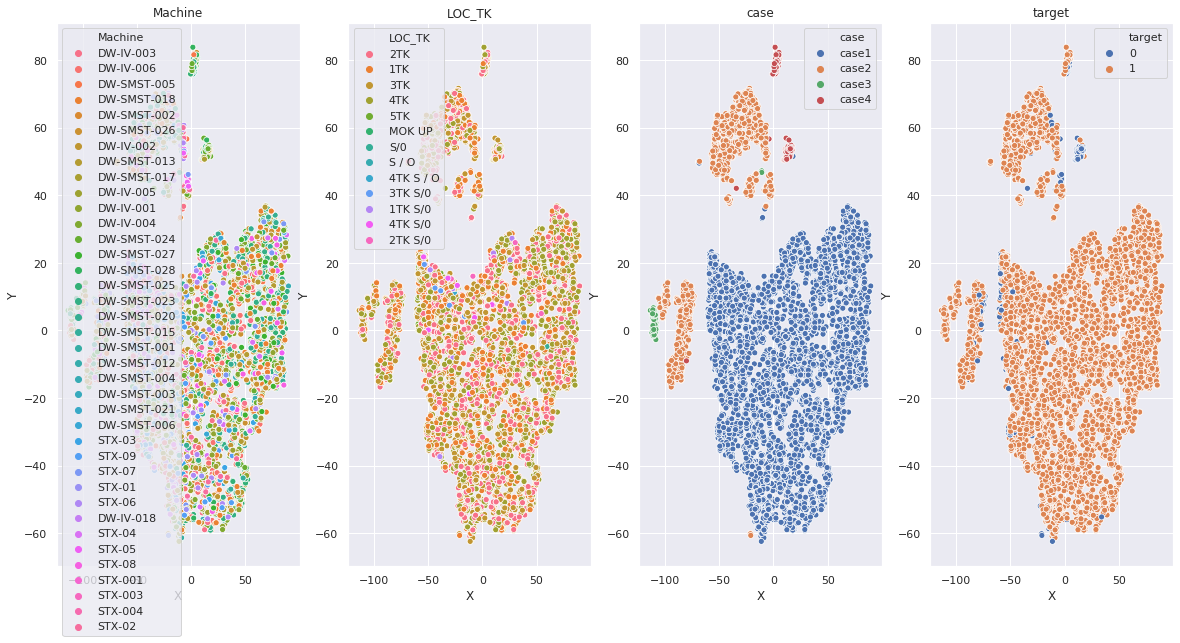

In [28]:
data = seam_df.values[:,2:11]
data_embedded = TSNE(n_components=2).fit_transform(data)
embed_df = pd.DataFrame(data_embedded, columns=["X" , "Y"])
embed_df = pd.merge(embed_df, seam_df, left_index=True, right_index=True)

targets = ["Machine", "LOC_TK", "case", "target"]

f, axes = plt.subplots(1,4, figsize=(20, 10))
for i in range(4):
    sns.scatterplot(  y="Y", x= "X", data=embed_df,  hue=targets[i],ax=axes[i]) 
    ax = axes[i]
    ax.set_title(targets[i])


In [50]:
welding_df

,seq_id,dvc_id,timestamp,yyyymmdd,yyyymm,yyyy,mm,dd,id,type,...,amprs,vltg,send_speed,inter_temp,outer_temp,in_pwr_vltg,in_user,in_dt,up_user,up_dt
0,950554,ITM.WED_GBS031401,2019-04-24 08:00:01,20190424,201904,2019,4,24,GBS031401,PFC600ES_WELDER,...,0,0,0,23,25,442,DCC.Welding-3.TH-Subscriptions,00:01.0,NaN,NaN
1,950556,ITM.WED_GBS031404,2019-04-24 08:00:01,20190424,201904,2019,4,24,GBS031404,PFC600ES_WELDER,...,0,0,0,22,24,444,DCC.Welding-WD4.TH-Subscriptions,00:01.0,NaN,NaN
2,950555,ITM.WED_GBS031403,2019-04-24 08:00:01,20190424,201904,2019,4,24,GBS031403,PFC600ES_WELDER,...,0,0,0,23,25,450,DCC.Welding-WD3.TH-Subscriptions,00:01.0,NaN,NaN
3,950557,ITM.WED_GBS031402,2019-04-24 08:00:01,20190424,201904,2019,4,24,GBS031402,PFC600ES_WELDER,...,0,0,0,23,25,447,DCC.Welding-2.TH-Subscriptions,00:01.0,NaN,NaN
4,950565,ITM.WED_GBS031402,2019-04-24 08:00:02,20190424,201904,2019,4,24,GBS031402,PFC600ES_WELDER,...,0,0,0,23,25,447,DCC.Welding-2.TH-Subscriptions,00:02.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12099,971725,ITM.WED_GBS031402,2019-04-24 08:50:25,20190424,201904,2019,4,24,GBS031402,PFC600ES_WELDER,...,0,691,11,26,23,436,DCC.Welding-2.TH-Subscriptions,50:25.0,NaN,NaN
12100,971729,ITM.WED_GBS031401,2019-04-24 08:50:26,20190424,201904,2019,4,24,GBS031401,PFC600ES_WELDER,...,0,0,0,23,24,433,DCC.Welding-3.TH-Subscriptions,50:26.0,NaN,NaN
12101,971728,ITM.WED_GBS031404,2019-04-24 08:50:26,20190424,201904,2019,4,24,GBS031404,PFC600ES_WELDER,...,0,0,0,23,25,435,DCC.Welding-WD4.TH-Subscriptions,50:26.0,NaN,NaN
12102,971730,ITM.WED_GBS031403,2019-04-24 08:50:26,20190424,201904,2019,4,24,GBS031403,PFC600ES_WELDER,...,0,0,0,24,25,441,DCC.Welding-WD3.TH-Subscriptions,50:26.0,NaN,NaN


In [32]:
columns = welding_df.columns
for col_name in columns:
    print("Column Name : {}".format(col_name))
    print("# of unique data : {}".format(len(welding_df[col_name].unique())))

Column Name : seq_id
# of unique data : 12104
Column Name : dvc_id
# of unique data : 4
Column Name : timestamp
# of unique data : 3026
Column Name : yyyymmdd
# of unique data : 1
Column Name : yyyymm
# of unique data : 1
Column Name : yyyy
# of unique data : 1
Column Name : mm
# of unique data : 1
Column Name : dd
# of unique data : 1
Column Name : id
# of unique data : 4
Column Name : type
# of unique data : 1
Column Name : maker
# of unique data : 1
Column Name : firm_ver
# of unique data : 1
Column Name : set_wttg
# of unique data : 45
Column Name : set_amprs
# of unique data : 27
Column Name : set_vltg
# of unique data : 18
Column Name : set_send_speed
# of unique data : 18
Column Name : wttg
# of unique data : 383
Column Name : amprs
# of unique data : 105
Column Name : vltg
# of unique data : 61
Column Name : send_speed
# of unique data : 39
Column Name : inter_temp
# of unique data : 8
Column Name : outer_temp
# of unique data : 4
Column Name : in_pwr_vltg
# of unique data : 21

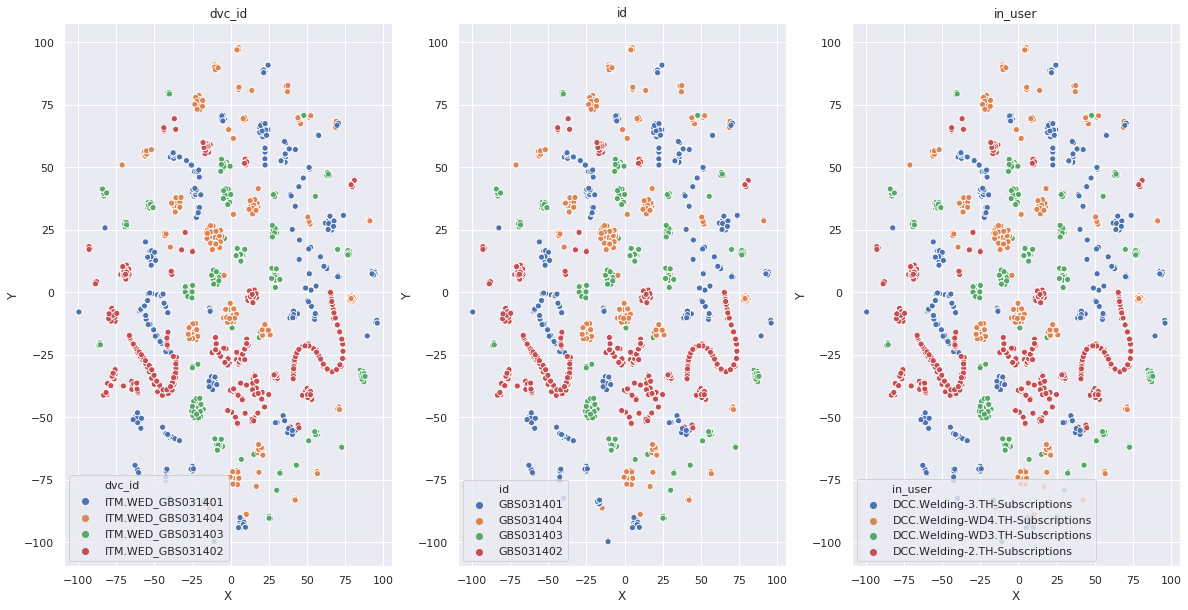

In [53]:
data = welding_df.values[:,12:23]
data_embedded = TSNE(n_components=2).fit_transform(data)
embed_df = pd.DataFrame(data_embedded, columns=["X" , "Y"])
embed_df = pd.merge(embed_df, welding_df, left_index=True, right_index=True)

targets = ["dvc_id", "id", "in_user"]

f, axes = plt.subplots(1,3, figsize=(20, 10))
for i in range(3):
    sns.scatterplot(  y="Y", x= "X", data=embed_df,  hue=targets[i],ax=axes[i]) 
    ax = axes[i]
    ax.set_title(targets[i])

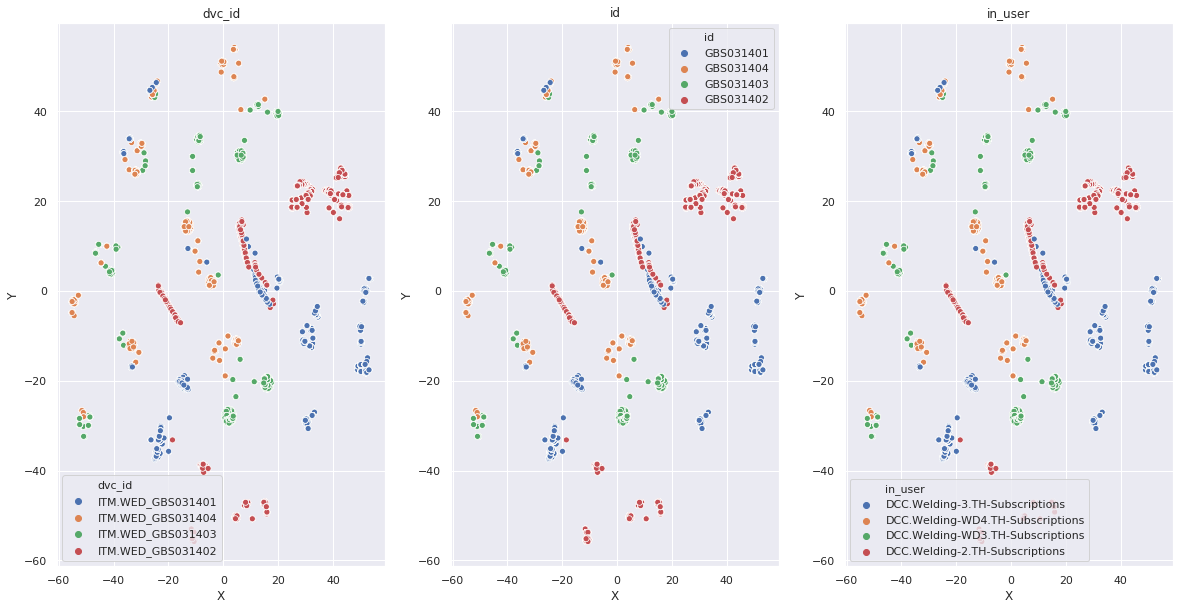

In [54]:
data = welding_df.values[:,12:23]
data_embedded = TSNE(n_components=2, perplexity=200).fit_transform(data)
embed_df = pd.DataFrame(data_embedded, columns=["X" , "Y"])
embed_df = pd.merge(embed_df, welding_df, left_index=True, right_index=True)

targets = ["dvc_id", "id", "in_user"]

f, axes = plt.subplots(1,3, figsize=(20, 10))
for i in range(3):
    sns.scatterplot(  y="Y", x= "X", data=embed_df,  hue=targets[i],ax=axes[i]) 
    ax = axes[i]
    ax.set_title(targets[i])